# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group

df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [37]:
# TODO: Group by site
site_means = df.groupby('site')[['age', 'bmi', 'systolic_bp', 'diastolic_bp']].mean()
print(site_means)

                   age        bmi  systolic_bp  diastolic_bp
site                                                        
  SITE A     23.608108  25.872059   116.633803     73.985915
  SITE B     59.670213  26.822826   118.055556     73.388889
  SITE C     60.254545  25.688889   115.942308     72.961538
  SITE D     77.853659  25.892105   119.513514     74.972973
  SITE E     12.258065  25.496667   113.066667     71.900000
  Site  A    80.328358  25.452239   118.552239     74.611940
  Site A     49.843750  26.263934   119.682540     75.730159
  Site B     56.318182  26.521429   117.035294     73.494118
  Site C     27.831325  26.454054   116.419753     73.938272
  Site D    -25.312500  26.387097   117.406250     74.062500
  Site E     75.500000  27.102857   119.600000     72.025000
  Site_D      9.870968  25.533333   118.827586     74.724138
  site a     67.270270  25.609859   116.704225     72.014085
  site b     57.022222  25.615909   117.393258     73.258427
  site c     80.929825  

In [38]:
# TODO: Count by intervention group
intervention_counts = df.groupby('intervention_group').size()
print(intervention_counts)

intervention_group
  CONTROL            84
  Contrl             73
  Control            95
  TREATMENT A        65
  TREATMENT B        83
  Treatmen A         60
  Treatment  B       64
  Treatment A        66
  Treatment B       104
  TreatmentA         66
  control            83
  treatment a        67
  treatment b        90
CONTROL             715
Contrl              802
Control             751
TREATMENT A         572
TREATMENT B         761
Treatmen A          592
Treatment  B        760
Treatment A         610
Treatment B         730
TreatmentA          635
control             734
treatment a         588
treatment b         750
dtype: int64


**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [39]:
# TODO: Use summarize_by_group utility
site_summary = summarize_by_group(df, 'site')
print(site_summary)

               age                                                           \
             count       mean         std    min    25%   50%    75%    max   
site                                                                          
  SITE A      74.0  23.608108  246.535880 -999.0  71.00  81.0  94.50  100.0   
  SITE B      94.0  59.670213  157.423433 -999.0  73.25  81.0  93.75  100.0   
  SITE C      55.0  60.254545  146.070787 -999.0  69.50  78.0  90.50  100.0   
  SITE D      41.0  77.853659   11.501219   55.0  69.00  78.0  87.00  100.0   
  SITE E      31.0  12.258065  270.211641 -999.0  70.00  81.0  89.00  100.0   
  Site  A     67.0  80.328358   14.431015   49.0  70.50  77.0  92.50  100.0   
  Site A      64.0  49.843750  190.210011 -999.0  73.00  83.0  92.00  100.0   
  Site B      88.0  56.318182  162.423495 -999.0  69.00  80.5  93.00  100.0   
  Site C      83.0  27.831325  232.797453 -999.0  69.00  79.0  88.50  100.0   
  Site D      32.0 -25.312500  318.343742 -999.0  66

## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [40]:
# TODO: Multiple aggregations
multi_agg = df.groupby('site').agg({
    'age': ['mean', 'std', 'min', 'max'],
    'bmi': ['mean', 'std'],
    'systolic_bp': ['mean', 'median']
})

display(multi_agg)


age                              bmi           systolic_bp  \
                  mean         std  min  max       mean       std        mean   
site                                                                            
  SITE A     23.608108  246.535880 -999  100  25.872059  4.805123  116.633803   
  SITE B     59.670213  157.423433 -999  100  26.822826  3.562445  118.055556   
  SITE C     60.254545  146.070787 -999  100  25.688889  6.682268  115.942308   
  SITE D     77.853659   11.501219   55  100  25.892105  8.003154  119.513514   
  SITE E     12.258065  270.211641 -999  100  25.496667  3.439275  113.066667   
  Site  A    80.328358   14.431015   49  100  25.452239  5.813447  118.552239   
  Site A     49.843750  190.210011 -999  100  26.263934  4.044504  119.682540   
  Site B     56.318182  162.423495 -999  100  26.521429  3.800034  117.035294   
  Site C     27.831325  232.797453 -999  100  26.454054  3.563521  116.419753   
  Site D    -25.312500  318.343742 -999  100  26.387097  3.759321  117.406250   
  Site E     75.500000   13.800406   49  100  27.102857  5.825122  119.600000   
  Site_D      9.870968  269.613024 -999  100  25.533333  3.414607  118.827586   
  site a     67.270270  126.507924 -999  100  25.609859  5.854819  116.704225   
  site b     57.022222  160.594050 -999  100  25.615909  4.345982  117.393258   
  site c     80.929825   14.747711   53  100  26.356364  3.800476  119.714286   
  site d     81.000000   14.422205   57  100  27.180000  3.501150  121.333333   
  site e     83.194444   12.825910   57  100  26.333333  5.603468  120.000000   
SITE A       60.910819  148.246933 -999  100  26.060392  4.820689  117.091743   
SITE B       63.628734  134.770408 -999  100  25.674189  4.897212  117.032544   
SITE C       55.459504  162.993247 -999  100  25.691182  5.824849  117.638261   
SITE D       55.511182  160.261127 -999  100  25.858667  5.384434  118.488294   
SITE E       51.867797  176.227858 -999  100  25.137868  6.088232  117.436170   
Site  A      53.770925  169.132015 -999  100  25.725865  5.420531  118.632777   
Site A       61.440242  144.932162 -999  100  25.977864  4.292863  117.093060   
Site B       56.911685  158.057697 -999  100  25.567525  5.022219  117.124823   
Site C       60.890578  145.157313 -999  100  25.847143  5.264630  118.508744   
Site D       67.472376  127.094118 -999  100  25.636919  6.590102  118.017751   
Site E       56.429467  158.975376 -999  100  25.579667  6.118371  117.065574   
Site_D       77.993976   60.864666 -999  100  25.167532  5.955124  117.492063   
site a       49.803379  182.495879 -999  100  25.770048  5.236569  116.344992   
site b       68.405660  112.300619 -999  100  25.644852  5.460254  117.091292   
site c       56.832520  161.800837 -999  100  25.695408  5.373529  117.973064   
site d       61.882521  141.173267 -999  100  25.290030  5.736454  117.205438   
site e       61.860544  140.441664 -999  100  25.377899  6.355154  117.907801   

                    
            median  
site                
  SITE A     115.0  
  SITE B     119.0  
  SITE C     115.0  
  SITE D     120.0  
  SITE E     111.0  
  Site  A    119.0  
  Site A     120.0  
  Site B     117.0  
  Site C     117.0  
  Site D     118.0  
  Site E     118.0  
  Site_D     117.0  
  site a     114.0  
  site b     118.0  
  site c     118.0  
  site d     124.0  
  site e     120.0  
SITE A       117.0  
SITE B       117.0  
SITE C       118.0  
SITE D       118.0  
SITE E       117.5  
Site  A      118.0  
Site A       117.0  
Site B       117.0  
Site C       118.0  
Site D       117.5  
Site E       117.0  
Site_D       117.0  
site a       116.0  
site b       117.0  
site c       117.0  
site d       116.0  
site e       118.0

## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [56]:
# TODO: Intervention group comparisons

# Clean intervention_groups
df['intervention_group'] = df['intervention_group'].astype(str).str.lower().str.strip()
df['intervention_group'] = df['intervention_group'].str.replace(r'\s+', ' ', regex=True)
df['intervention_group'] = df['intervention_group'].replace({
    'contrl': 'control',
    'treatmen a': 'treatment a',
    'treatment  b': 'treatment b',
    'treatmenta': 'treatment a',
    'treatmentb': 'treatment b'
})

# Clean site column
df['site'] = df['site'].astype(str).str.upper().str.strip()
df['site'] = df['site'].str.replace(r'\s+', ' ', regex=True)
df['site'] = df['site'].str.replace('SITE_', 'SITE ')

# Convert outcome_cvd and dropout
df['outcome_cvd'] = df['outcome_cvd'].astype(str).str.lower().str.strip().map({'yes': 1, 'no': 0, '1': 1, '0': 0})
df['dropout'] = df['dropout'].astype(str).str.lower().str.strip().map({'yes': 1, 'no': 0, '1': 1, '0': 0})

# 1. Calculate mean outcome_cvd rate by intervention_group
cvd_by_group = df.groupby('intervention_group')['outcome_cvd'].mean()
print(cvd_by_group)

# 2. Calculate mean adherence_pct by intervention_group
adherence_by_group = df.groupby('intervention_group')['adherence_pct'].mean()
print(adherence_by_group)

# 3. Create a cross-tabulation of intervention_group vs dropout status
crosstab = pd.crosstab(df['intervention_group'], df['dropout'])
print(crosstab)


intervention_group
control        0.336530
treatment a    0.319482
treatment b    0.333633
Name: outcome_cvd, dtype: float64
intervention_group
control        60.621688
treatment a    60.210173
treatment b    61.009404
Name: adherence_pct, dtype: float64
dropout                0    1
intervention_group           
control             2831  506
treatment a         2831  490
treatment b         2871  471


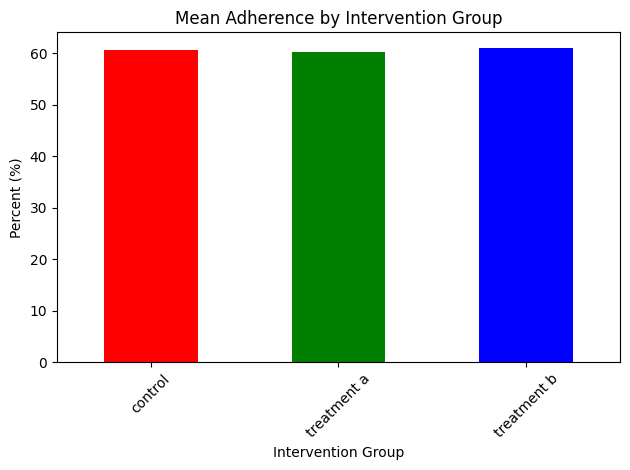

In [53]:
# TODO: Visualization
adherence_by_group.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Mean Adherence by Intervention Group')
plt.xlabel('Intervention Group')
plt.ylabel('Percent (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [55]:
# TODO: Save summary outputs

# 1. Summary statistics by site
site_summary = df.groupby('site')[['age', 'bmi', 'systolic_bp', 'diastolic_bp']].describe()
site_summary.to_csv('output/q7_site_summary.csv')

# 2. Intervention group comparison
intervention_comparison = pd.DataFrame({
    'cvd_rate': cvd_by_group,
    'adherence': adherence_by_group
})
intervention_comparison.to_csv('output/q7_intervention_comparison.csv')

# 3. Text report with key findings
with open('output/q7_analysis_report.txt', 'w') as f:
    f.write("Clinical Trial Analysis Report\n\n")
    f.write(f"Total patients analyzed: {len(df)}\n\n")
    f.write("Key Findings:\n")
    f.write(f"- Highest adherence: {adherence_by_group.idxmax()} ({adherence_by_group.max():.1f}%)\n")
    f.write(f"- Lowest adherence: {adherence_by_group.idxmin()} ({adherence_by_group.min():.1f}%)\n")
    f.write(f"- CVD outcomes vary across intervention groups\n")

## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. Treatment B had the highest patient adherence at 61.0% in comparison to the control and Treatment A, which had 60.6% and 60.2% respectively.
2. CVD outcome was the lowest in Treatment A group at 31.9%, compared to 33.7% in the control and 33.4% in Treatment B.
3. The dropout rates were relatively the same throughout the three groups, ranging from 16.4% in Treatment B, 17.9% in the control, and 17.3% in Treatment A.
